# import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1_read and understand the data

In [5]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## columns_to_drop

In [7]:
columns_to_drop = ["PassengerId","Name","Ticket"]
df.drop(columns_to_drop, axis = 1,inplace = True)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### rearange the columns

In [10]:
cols = df.columns.tolist()

In [11]:
cols

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

In [12]:
cols.pop(0)
cols.append("Survived")
cols

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [13]:
df = df[cols]

# 2_data types

In [15]:
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1


In [16]:
df.tail(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
888,3,female,NaN,1,2,23.45,NaN,S,0
889,1,male,26.0,0,0,30.00,C148,C,1
890,3,male,32.0,0,0,7.75,NaN,Q,0


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [19]:
null = df.isnull().sum()
null_ratio = null / df.shape[0] * 100
dtypes = df.dtypes
pd.DataFrame(data = {"null" : null, "null_ration" : null_ratio, "dtypes" : dtypes}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
null,0,0,177,0,0,0,687,2,0
null_ration,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467,0.0
dtypes,int64,object,float64,int64,int64,float64,object,object,int64


### handle null values in column Age

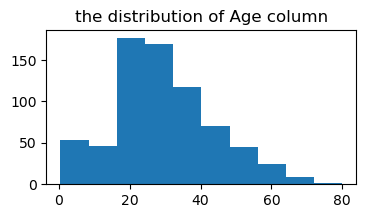

In [21]:
plt.figure(figsize = (4,2))
plt.hist(df["Age"])
plt.title("the distribution of Age column")
plt.show()

In [22]:
df["Age"] = df["Age"].fillna(df["Age"].median())

### handle null values in column Cabin

In [24]:
df.drop("Cabin", axis = 1, inplace = True)

### handle null values in column Embarked

In [26]:
df.dropna(subset = ["Embarked"] , inplace = True)

In [27]:
null = df.isnull().sum()
null_ratio = null / df.shape[0] * 100
dtypes = df.dtypes
pd.DataFrame(data = {"null" : null, "null_ration" : null_ratio, "dtypes" : dtypes}).T

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
null,0,0,0,0,0,0,0,0
null_ration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dtypes,int64,object,float64,int64,int64,float64,object,int64


## outlires by Z_score

In [29]:
num_col = df.select_dtypes(include = ["number"]).columns


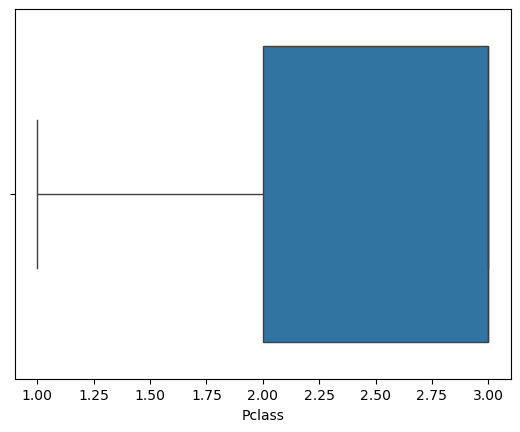

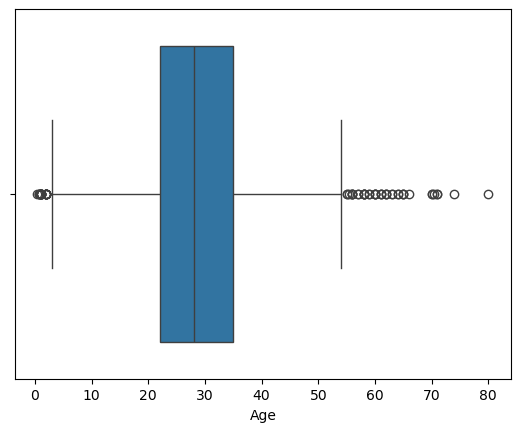

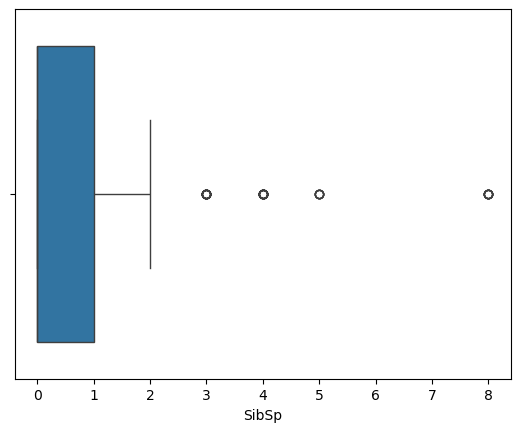

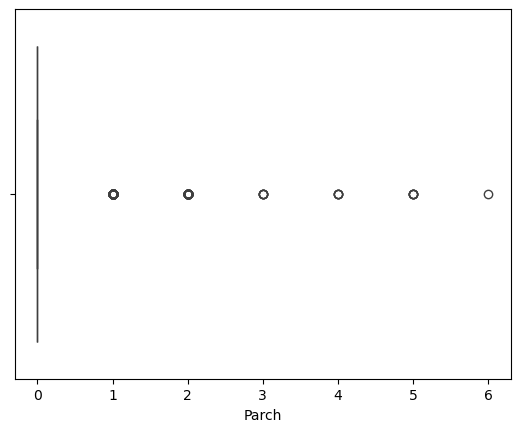

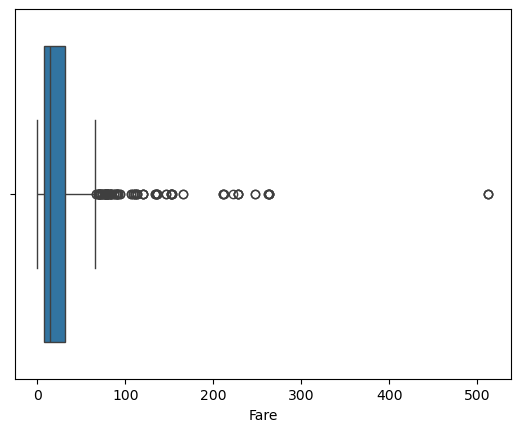

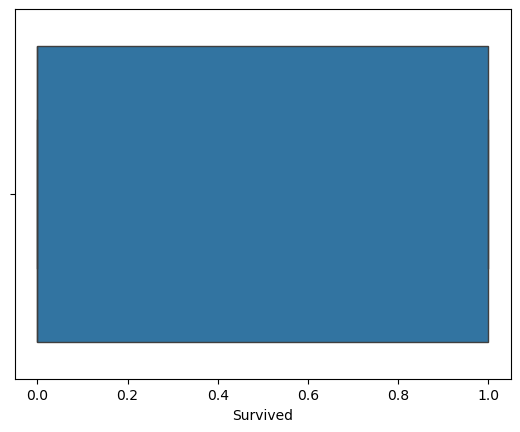

In [30]:
for i in num_col:
    sns.boxplot(df[i], orient = "h")
    plt.show()

# z_score

C:\Users\Mx\AppData\Local\Temp\ipykernel_16096\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

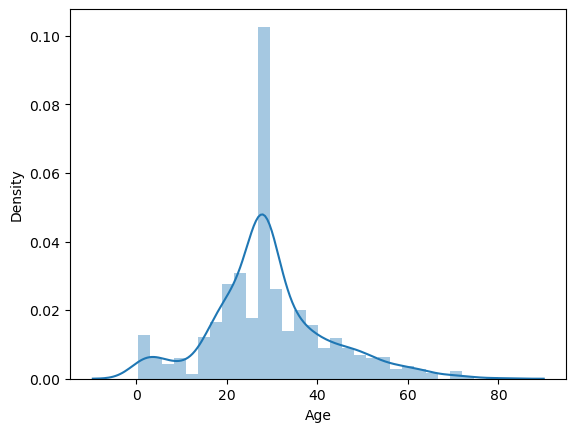

In [32]:
sns.distplot(df['Age'])

C:\Users\Mx\AppData\Local\Temp\ipykernel_16096\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

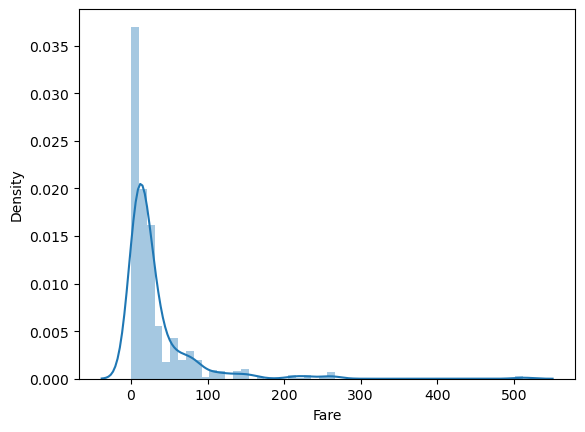

In [33]:
sns.distplot(df['Fare'])

In [34]:
for i in ["Age", "Fare"]:
    min_range = df[i].mean() - (3 * df[i].std())
    max_range = df[i].mean() + (3 * df[i].std())
    df = df[(df[i] <= max_range) & (df[i] >= min_range)]

In [35]:
"""
for i in num_col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 0.5)
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
"""

'\nfor i in num_col:\n    q1 = df[i].quantile(0.25)\n    q3 = df[i].quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - (iqr * 1.5)\n    upper_bound = q3 + (iqr * 0.5)\n    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]\n'

In [36]:
"""
for i in num_col:
    plt.supplot((2,3))
    sns.boxplot(df[i], orient = "h")
    plt.show()
    """

'\nfor i in num_col:\n    plt.supplot((2,3))\n    sns.boxplot(df[i], orient = "h")\n    plt.show()\n    '

# duplicated

In [38]:
df.duplicated().sum()

116

In [39]:
df[df.duplicated()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
47,3,female,28.0,0,0,7.7500,Q,1
55,1,male,28.0,0,0,35.5000,S,1
76,3,male,28.0,0,0,7.8958,S,0
77,3,male,28.0,0,0,8.0500,S,0
87,3,male,28.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
870,3,male,26.0,0,0,7.8958,S,0
877,3,male,19.0,0,0,7.8958,S,0
878,3,male,28.0,0,0,7.8958,S,0
884,3,male,25.0,0,0,7.0500,S,0


In [40]:
df.drop_duplicates(inplace = True)

In [41]:
df.reset_index(drop = True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
741,3,female,39.0,0,5,29.1250,Q,0
742,1,female,19.0,0,0,30.0000,S,1
743,3,female,28.0,1,2,23.4500,S,0
744,1,male,26.0,0,0,30.0000,C,1


# dtypes

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    746 non-null    int64  
 1   Sex       746 non-null    object 
 2   Age       746 non-null    float64
 3   SibSp     746 non-null    int64  
 4   Parch     746 non-null    int64  
 5   Fare      746 non-null    float64
 6   Embarked  746 non-null    object 
 7   Survived  746 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 52.5+ KB


In [44]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [45]:
df["Sex"].nunique()

2

In [46]:
df["Sex"].value_counts()

Sex
male      468
female    278
Name: count, dtype: int64

In [47]:
df["Sex"] = df["Sex"].replace({"female" : 0, "male" : 1})

C:\Users\Mx\AppData\Local\Temp\ipykernel_16096\4009732494.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"female" : 0, "male" : 1})


In [48]:
df.rename(columns = {"Cabin":"room"},inplace = True)

In [49]:
object_columns = df.select_dtypes(include = ["object"]).columns

In [50]:
object_columns

Index(['Embarked'], dtype='object')

In [51]:
df = pd.get_dummies(data = df, columns = object_columns, drop_first = True)

In [52]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,False,True
1,1,0,38.0,1,0,71.2833,1,False,False
2,3,0,26.0,0,0,7.9250,1,False,True
3,1,0,35.0,1,0,53.1000,1,False,True
4,3,1,35.0,0,0,8.0500,0,False,True
...,...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,0,True,False
887,1,0,19.0,0,0,30.0000,1,False,True
888,3,0,28.0,1,2,23.4500,0,False,True
889,1,1,26.0,0,0,30.0000,1,False,False


In [53]:
bool_columns = df.select_dtypes(include = ["bool"]).columns
for i in bool_columns:
    df[i] = df[i].apply(lambda x : x * 1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      746 non-null    int64  
 1   Sex         746 non-null    int64  
 2   Age         746 non-null    float64
 3   SibSp       746 non-null    int64  
 4   Parch       746 non-null    int64  
 5   Fare        746 non-null    float64
 6   Survived    746 non-null    int64  
 7   Embarked_Q  746 non-null    int64  
 8   Embarked_S  746 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.3 KB


<Axes: xlabel='Age', ylabel='Count'>

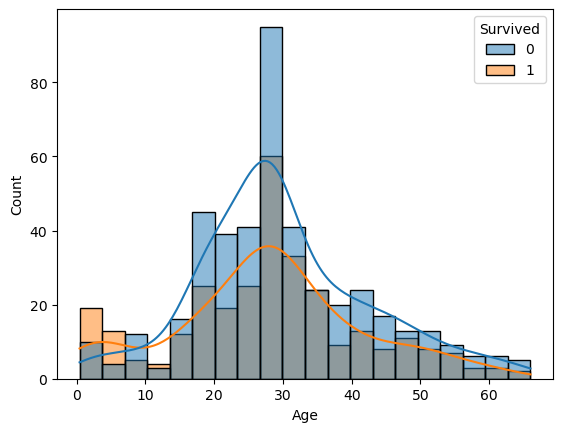

In [55]:
sns.histplot(data = df, x = df["Age"], kde = True, hue = df["Survived"])

<Axes: xlabel='Survived', ylabel='count'>

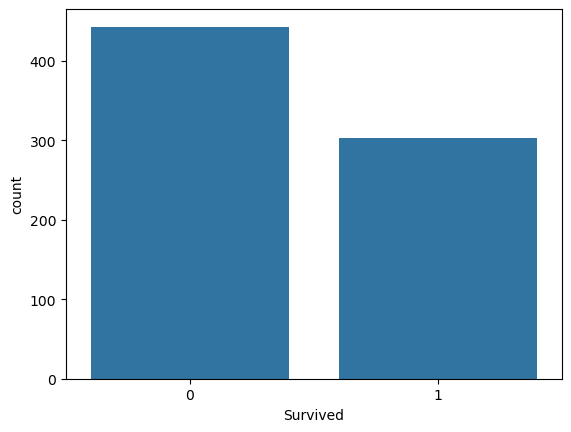

In [56]:
sns.countplot(data = df,x =  "Survived")

<Axes: >

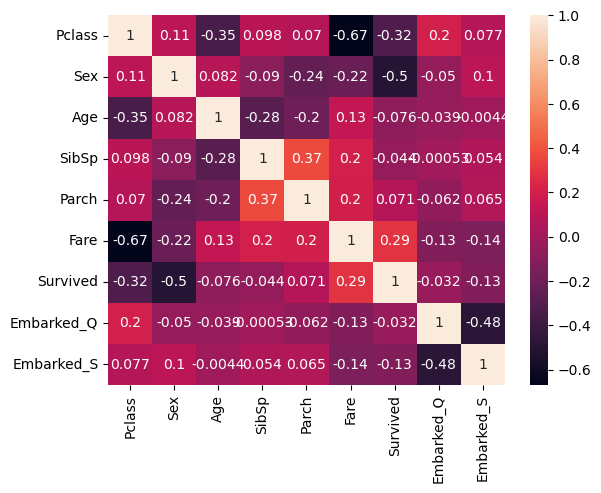

In [57]:
sns.heatmap(data = df.corr(), annot = True)

In [58]:
df.drop(["Parch","SibSp","Age"],axis = 1, inplace = True)

In [59]:
x = df.iloc[:,:].drop("Survived", axis = 1)
y = df["Survived"]

# Standardization

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
ss = StandardScaler()
x = ss.fit_transform(x)

# split the data

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [66]:
lr.score(x_train, y_train)

0.7337164750957854

In [67]:
lr.score(x_test, y_test)

0.8080357142857143

In [68]:
y_pred = lr.predict(x_test)

In [69]:
lr.score(x_test, y_pred)

1.0

In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [71]:
confusion_matrix(y_test, y_pred)

array([[113,  24],
       [ 19,  68]], dtype=int64)

In [72]:
classes = ["1","2"]

In [73]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

           1       0.86      0.82      0.84       137
           2       0.74      0.78      0.76        87

    accuracy                           0.81       224
   macro avg       0.80      0.80      0.80       224
weighted avg       0.81      0.81      0.81       224



In [148]:
print(f"confusion_matrix \n{confusion_matrix(y_pred, y_test)}")
print("-------------------------------------------")
print(f"accuracy_score \n{accuracy_score(y_pred, y_test)}")
print("-------------------------------------------")
print(f"precision_score \n{precision_score(y_pred, y_test)}")
print("-------------------------------------------")
print(f"recall_score \n{recall_score(y_pred, y_test)}")
print("-------------------------------------------")
print(f"f1_score \n{f1_score(y_pred, y_test)}")
print("-------------------------------------------")

confusion_matrix 
[[113  19]
 [ 24  68]]
-------------------------------------------
accuracy_score 
0.8080357142857143
-------------------------------------------
precision_score 
0.7816091954022989
-------------------------------------------
recall_score 
0.7391304347826086
-------------------------------------------
f1_score 
0.7597765363128491
-------------------------------------------
